<a href="https://colab.research.google.com/github/melinnicri/DS-M4-Cluster_Spark/blob/main/Recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data imports

import pandas as pd

import numpy as np

import os

#Visualization imports

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [ ]:
# Open file 1
with open("/content/drive/MyDrive/Movie/Movie_Id_Titles", "r") as archivo:
    contenido = archivo.read()


In [ ]:
# Read the text file into a DataFrame
title_df = pd.read_csv('/content/drive/MyDrive/Movie/Movie_Id_Titles', sep=',')

# Show DataFrame
print(title_df)


      item_id                                      title
0           1                           Toy Story (1995)
1           2                           GoldenEye (1995)
2           3                          Four Rooms (1995)
3           4                          Get Shorty (1995)
4           5                             Copycat (1995)
...       ...                                        ...
1677     1678                          Mat' i syn (1997)
1678     1679                           B. Monkey (1998)
1679     1680                       Sliding Doors (1998)
1680     1681                        You So Crazy (1994)
1681     1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]


In [ ]:
# Open file 2
with open("/content/drive/MyDrive/Movie/u.data", "r") as archivo:
    contenido = archivo.read()

In [ ]:
# Read the text file into a DataFrame
data_df = pd.read_csv('/content/drive/MyDrive/Movie/u.data', sep='\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

# Show DataFrame
print(data_df)

        user_id  item_id  rating  timestamp
0             0       50       5  881250949
1             0      172       5  881250949
2             0      133       1  881250949
3           196      242       3  881250949
4           186      302       3  891717742
...         ...      ...     ...        ...
99998       880      476       3  880175444
99999       716      204       5  879795543
100000      276     1090       1  874795795
100001       13      225       2  882399156
100002       12      203       3  879959583

[100003 rows x 4 columns]


In [ ]:
# Open file 3
with open("/content/drive/MyDrive/Movie/item.csv", "r", encoding="ISO-8859-1") as archivo:
    contenido = archivo.read()


In [ ]:
contenido

"ï»¿1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0\n2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0\n5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0\n6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0\n7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0\n8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995

In [ ]:
# Read the text file into a DataFrame
item_df = pd.read_csv('/content/drive/MyDrive/Movie/item.csv', sep='|', header=None)

# Show the DataFrame
print(item_df)


        0                                          1            2   3   \
0        1                           Toy Story (1995)  01-Jan-1995 NaN   
1        2                           GoldenEye (1995)  01-Jan-1995 NaN   
2        3                          Four Rooms (1995)  01-Jan-1995 NaN   
3        4                          Get Shorty (1995)  01-Jan-1995 NaN   
4        5                             Copycat (1995)  01-Jan-1995 NaN   
...    ...                                        ...          ...  ..   
1677  1678                          Mat' i syn (1997)  06-Feb-1998 NaN   
1678  1679                           B. Monkey (1998)  06-Feb-1998 NaN   
1679  1680                       Sliding Doors (1998)  01-Jan-1998 NaN   
1680  1681                        You So Crazy (1994)  01-Jan-1994 NaN   
1681  1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996 NaN   

                                                     4   5   6   7   8   9   \
0     http://us.imdb.com/M/title

In [ ]:
# Show column names
column_names = item_df.columns.tolist()

In [ ]:
# Print colum names
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
# Join data and title data, on item_id
merged_data = pd.merge(data_df, title_df, on='item_id')

In [ ]:
# Show new DF
merged_data.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

In [ ]:
# (Explore) Show average rating sorted by movie
merged_data.groupby('title')['rating'].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [ ]:
# (Explore) Show count rating sorted by movie
merged_data.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [ ]:
# We save the average rating of the movies in a dataframe
ratings_data = pd.DataFrame(merged_data.groupby('title')['rating'].mean())

In [ ]:
# Movie rating number (count)
ratings_data['# of ratings'] = merged_data.groupby('title')['rating'].count()

In [ ]:
# Show
ratings_data

,rating,# of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<ipython-input-18-1dd6e0097db3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['# of ratings'])


<Axes: xlabel='# of ratings', ylabel='Density'>

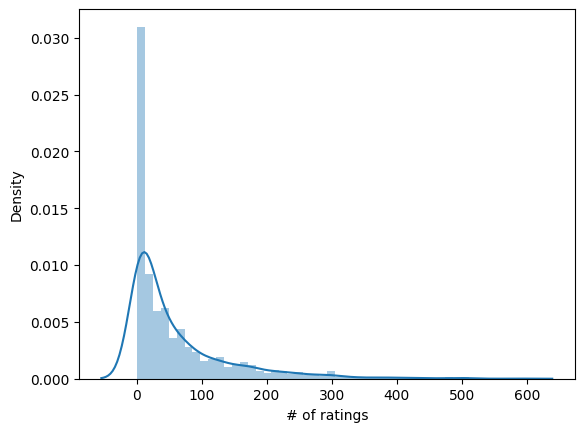

In [ ]:
# Now, graph (histogram) this number of movie ratings
sns.distplot(ratings_data['# of ratings'])

As you can see, most movies seem to have 0 ratings or 1 rating. This makes sense: very few movies have the mass appeal of receiving many ratings from viewers.

<ipython-input-19-57a6d09d06c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['rating'])


<Axes: xlabel='rating', ylabel='Density'>

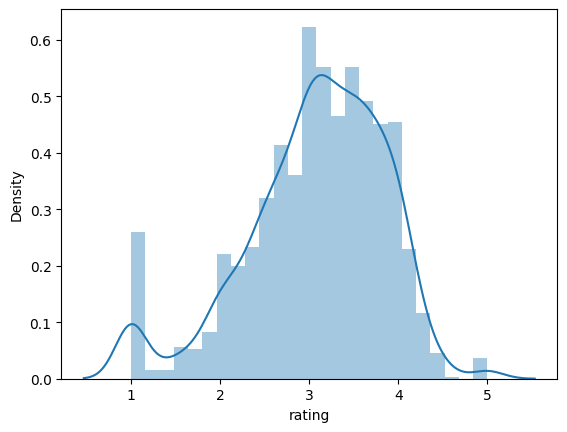

In [ ]:
# Graph rating data
sns.distplot(ratings_data['rating'])

As you can see, most of the games seem to be distributed around a rating of roughly 3-4, and in some peaks (1, 5).

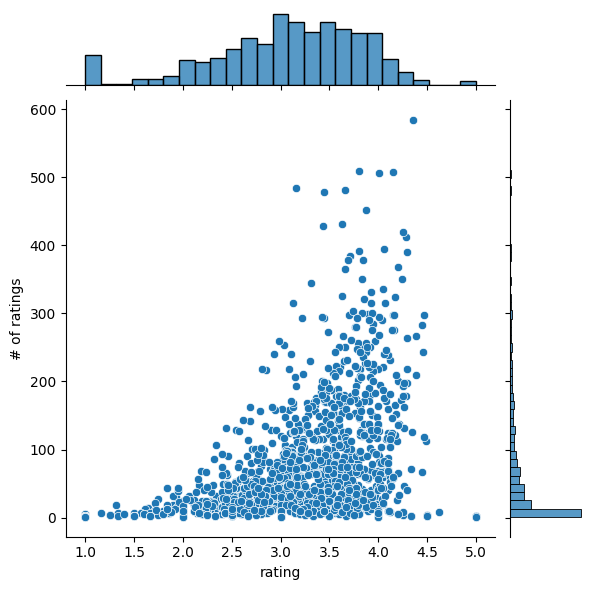

In [ ]:
# Let's create one last visualization that explores the relationship between a movie's
# average rating and its number of ratings.
sns.jointplot(x = ratings_data['rating'], y = ratings_data['# of ratings'])

There appears to be a positive relationship between the number of ratings and the average rating. Put another way, movies with high average ratings tend to have higher ratings, and vice versa.

Our recommendation system works based on the similarities between movies. More specifically, it will recommend movies that other users with similar tastes have enjoyed.

To demonstrate this, we will select two movies from the data set:

Toy Story (1995) and
Returns of the Jedi (1983)

The first thing we have to do is create matrices containing the user ratings for each movie in the data set. These movie matrices will allow you to see how each user rated each movie in the data set.

Let's create these user classification matrices with the following code:

In [ ]:
ratings_matrix = merged_data.pivot_table(index='user_id',columns='title',values='rating')

In [ ]:
star_wars_user_ratings = ratings_matrix['Return of the Jedi (1983)']

In [ ]:
toy_story_user_ratings = ratings_matrix['Toy Story (1995)']

In [ ]:
# User rating
toy_story_user_ratings.head(5)

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [ ]:
# Next, we will use the method to calculate the Correlation between the y data sets.
# This will allow us to see if the movies are similar, as their distribution of ratings across users will be highly correlated if so.
ratings_matrix.corrwith(toy_story_user_ratings)['Return of the Jedi (1983)']

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


0.18709230116786751

In [ ]:
# The same for Toy Story
ratings_matrix.corrwith(star_wars_user_ratings)['Toy Story (1995)']

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


0.18709230116786751

The movies are not very similar since they have a low rating.

Let's try to find a movie that is similar to the other movie. To do this, we build a pandas DataFrame that stores the user rating ranking of each movie with the user ratings.

In [ ]:
correlation_with_star_wars = pd.DataFrame(ratings_matrix.corrwith(star_wars_user_ratings))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
correlation_with_star_wars.dropna().sort_values(0, ascending = False).head(15)

,0
title,
Stripes (1981),1.0
Guantanamera (1994),1.0
Manny & Lo (1996),1.0
"Quiet Room, The (1996)",1.0
Return of the Jedi (1983),1.0
A Chef in Love (1996),1.0
Cosi (1996),1.0
Mrs. Dalloway (1997),1.0
King of the Hill (1993),1.0


There is a lot going on in this command, so let's break it down step by step:

The first line of code creates a pandas DataFrame with a single column showing the correlation of the user ratings of each movie with the user ratings of Return of the Jedi (1983)
Method removes null values from DataFrame (dropna)
The method combined with the arguments and modifies the DataFrame so that the most similar movies are displayed on top (sort_values, 0, ascending = False)
The method displays only the 15 entries at the top of the DataFrame (head(15))

You may notice that some of the results from this DataFrame don't make sense. That is, why do the user ratings of so many films have perfect correlations with the user ratings of Return of the Jedi (1983)?

The cause of this anomaly is the small sample size bias. That is, these perfectly correlated films have likely only been seen by one person who has also seen the others, and that user gave both films, Return of the Jedi (1983), the same rating.

Fortunately, it is relatively easy to fix this problem. I would simply filter the recommendation system to exclude movies that had less than a certain number of reviews.

We're going to filter out movies that have fewer than 50 reviews to improve the basic recommendation system we've created in this exercise so far.

To start this process, we want to add the number of ratings for each movie to our data structure.

In [ ]:
correlation_with_star_wars = correlation_with_star_wars.join(ratings_data['# of ratings'])

In [ ]:
correlation_with_star_wars.columns = ['Corr. With SW Ratings', '# of Ratings']

correlation_with_star_wars.index.names = ['Movie Title']

In [ ]:
correlation_with_star_wars

,Corr. With SW Ratings,# of Ratings
Movie Title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41
...,...,...
Young Guns II (1990),0.347842,44
"Young Poisoner's Handbook, The (1995)",0.036205,41
Zeus and Roxanne (1997),0.866025,6


As you can see, the DataFrame now contains the correlation of the ratings for each movie, as well as the number of ratings for that specific movie, Return of the Jedi (1983).

What we have to do now is filter out the movies that don't have at least 50 ratings.

As before, we will also sort the DataFrame so that the most similar movies are displayed at the top. Return of the Jedi (1983).

We will also use the method with a parameter of to return the 10 movies that are most similar to (head10) Return of the Jedi (1983).

Next:

In [ ]:
correlation_with_star_wars[correlation_with_star_wars['# of Ratings'] > 50].sort_values('Corr. With SW Ratings', ascending = False).head(10)

,Corr. With SW Ratings,# of Ratings
Movie Title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Manon of the Spring (Manon des sources) (1986),0.483421,58
Sabrina (1954),0.468079,64
Raiders of the Lost Ark (1981),0.467391,420
Giant (1956),0.448247,51
Restoration (1995),0.439437,71
Things to Do in Denver when You're Dead (1995),0.436042,71


This makes a lot more sense. As you can see, 3 of the top 10 movies are movies from the Star Wars franchise. There is also an Indiana Jones movie (), which has a similar feel to the Star Wars trilogy. Raiders of the Lost Ark (1981).  THE END ..._@v